# API EDA
- API Link:https://site.financialmodelingprep.com/
- API Documentation: https://site.financialmodelingprep.com/developer/docs

## Things to consider about the process carried out in this notebook!
- This EDA was conducted using a CSV file obtained at the end of the entire extraction process. This was done so that the extraction process of over 50,000 queries would not have to be repeated every time the notebook was used. However, you will find the complete extraction process as the result of a DataFrame here.
- The process began with a query to the financialmodelng API, which provided a dataset with 6 fields containing very general information. To enhance this dataset, we complemented it with information from Yahoo Finance, allowing us to obtain valuable information to augment the dataset obtained from the API extraction, which was quite limited. This additional process added significant value to the dataset with new fields and a plethora of records.
- It's worth noting that this data extraction process via an API was carried out to add value to our learning obtained from analyzing our initial dataset on technology layoffs. Therefore, we chose to address information related to the financial market of companies and their sectors.


## Library Imports
- Requests: This library facilitates all the work of sending information requests to APIs, allowing us to access the information in this dataset.
- Pandas, Matplotlib, and Numpy: These libraries will help us throughout the process of analysis and deep cleaning of our data.
- Yfinance: This library helps us to access vital financial data in a simple and fast way, without having as many limitations as APIs can have for their queries.

In [3]:
import requests
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Initial API Extraction Process
- The code makes a query to the fields that, as a first layer, the API allows us to request without any limitation on the number of queries, thus obtaining a general list of available stocks for each company that the API has registered.

- As a second step, the code will seek to complement the dataset obtained with fields that the same API offers us but in a limited way per query. That's why we use the yfinance library as a powerful tool for financial analysts.


In [ ]:
api_url = "https://financialmodelingprep.com/api/v3/available-traded/list?apikey=7lZIU82kV1JVXJZP2zHFFlJLvdvsswj0"
response = requests.get(api_url)

if response.status_code == 200:
    stock_data = response.json()
    df = pd.DataFrame(stock_data)
    df = df[['symbol', 'name', 'price', 'exchange', 'exchangeShortName']]
else:
    print("Error en la solicitud:", response.status_code)
    raise Exception("No se pudo obtener los datos de la API.")


def get_financial_info(symbol, index, total):
    try:
        ticker = yf.Ticker(symbol)
        info = ticker.info
        print(f"Procesando {index + 1}/{total}: {symbol}")
        return {
            'Industry': info.get('industry', 'Industria no disponible'),
            'Profit Margins': info.get('profitMargins', 'No disponible'),
            'PE Ratio': info.get('trailingPE', 'No disponible'),
            'Country': info.get('country', 'País no disponible'),
            'Full Time Employees': info.get('fullTimeEmployees', 'No disponible'),
            'City': info.get('city', 'Ciudad no disponible')
        }
    except Exception as e:
        print(f"Error al obtener la información de {symbol}: {e}")
        return {
            'Industry': 'Error',
            'Profit Margins': 'Error',
            'PE Ratio': 'Error',
            'Country': 'Error',
            'Full Time Employees': 'Error',
            'City': 'Error'
        }
    
    
info_list = []
total_symbols = len(df)
for index, symbol in enumerate(df['symbol']):
    info = get_financial_info(symbol, index, total_symbols)
    info_list.append(info)

df_info = pd.DataFrame(info_list)


df_final = pd.concat([df, df_info], axis=1)


print(df_final.head())


In [ ]:
df_final.head()

In [ ]:
df_final.info()

## API Extraction via CSV Option ( The option in this EDA )
- This process was carried out to facilitate the analysis of the dataset throughout the project. Remember that the procedure of extracting and complementing the dataset takes about 4 hours each time the notebook is initiated. Therefore, we opted for this alternative. You will also find another version of this EDA with the same process conducted solely with the DataFrame extracted directly from the entire acquisition process.
- In the complementation process, it was set as a parameter that if no record was found for one of the requested fields for the symbol provided by the initial API, the record for that field would be filled with "not available". This is evident in fields of the initial dataset records.


In [6]:
csv_file_path = '../Data_API/dataset_api.csv' 
dataset_API = pd.read_csv(csv_file_path)
print(dataset_API.head())
print(dataset_API.info())

     symbol                               name     price  \
0  TIETO.HE                      TietoEVRY Oyj  19.61000   
1       FMY   First Trust Mortgage Income Fund  12.17500   
2     EVGDF  Elevation Gold Mining Corporation   0.06626   
3      PAWZ             ProShares Pet Care ETF  49.81000   
4   2115.TW                Luhai Holding Corp.  29.75000   

                  exchange exchangeShortName                         Industry  \
0                 Helsinki               HEL  Information Technology Services   
1  New York Stock Exchange              NYSE                 Asset Management   
2                Other OTC               PNK                             Gold   
3                     BATS               ETF          Industria no disponible   
4                   Taiwan               TAI                       Auto Parts   

  Profit Margins       PE Ratio             Country Full Time Employees  \
0        0.06038      13.448276             Finland             24159.0   
1 

## Removal of Records with "Not Available" Value in the Dataset
- We decided to perform a rigorous cleaning process in which any record containing "Not Available" in any of its fields would be deleted, whether accompanied by other words or with "Not" in lowercase.
- To facilitate the removal of cases where the "Not Available" fields started with a capital letter due to a complement or a character from the previous one, we decided to convert all strings in the dataframe to lowercase.
- Fields with the aforementioned characteristics are replaced with NaN values to later remove them completely, finally resetting the index after removing the rows.

In [14]:
dataset_API = dataset_API.applymap(lambda x: x.lower() if isinstance(x, str) else x)

dataset_API.replace(to_replace=r'.*no\s+disponible.*', value=np.nan, regex=True, inplace=True)

dataset_API.dropna(inplace=True)

dataset_API.reset_index(drop=True, inplace=True)

print("Después de eliminar los registros 'No disponible':", dataset_API.shape)


Después de eliminar los registros 'No disponible': (16825, 11)


C:\Users\fedeg\AppData\Local\Temp\ipykernel_3820\3909471064.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataset_API = dataset_API.applymap(lambda x: x.lower() if isinstance(x, str) else x)


## Changing the Data Type of the 'Profit Margins', 'PE Ratio', and 'Full Time Employees' Columns to Numeric for Consistency in Handling Numbers Throughout the Records

In [18]:
dataset_API['profit margins'] = pd.to_numeric(dataset_API['profit margins'], errors='coerce')

dataset_API['pe ratio'] = pd.to_numeric(dataset_API['pe ratio'], errors='coerce')

dataset_API['full time employees'] = pd.to_numeric(dataset_API['full time employees'], errors='coerce')

print(dataset_API.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16825 entries, 0 to 16824
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symbol               16825 non-null  object 
 1   name                 16825 non-null  object 
 2   price                16825 non-null  float64
 3   exchange             16825 non-null  object 
 4   exchangeShortName    16825 non-null  object 
 5   industry             16825 non-null  object 
 6   profit margins       16825 non-null  float64
 7   pe ratio             16825 non-null  float64
 8   country              16825 non-null  object 
 9   full time employees  16825 non-null  float64
 10  city                 16825 non-null  object 
dtypes: float64(4), object(7)
memory usage: 1.4+ MB
None


## Text Normalization in Fields and Records
- As we can see, up to this point, we were handling our fields and records in a structure inconsistently, with some fields and records entirely in lowercase and others starting with uppercase letters.
- We perform this normalization to maintain consistency and ease of manipulation among fields in our dataset, similarly, we do it as a best practice.

In [19]:
column_names = dataset_API.columns

new_column_names = {col: col.lower() if col[0].isupper() else col for col in column_names}

dataset_API = dataset_API.rename(columns=new_column_names)

print(dataset_API.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16825 entries, 0 to 16824
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symbol               16825 non-null  object 
 1   name                 16825 non-null  object 
 2   price                16825 non-null  float64
 3   exchange             16825 non-null  object 
 4   exchangeShortName    16825 non-null  object 
 5   industry             16825 non-null  object 
 6   profit margins       16825 non-null  float64
 7   pe ratio             16825 non-null  float64
 8   country              16825 non-null  object 
 9   full time employees  16825 non-null  float64
 10  city                 16825 non-null  object 
dtypes: float64(4), object(7)
memory usage: 1.4+ MB
None


- Text normalization of records initially containing uppercase letters in our dataset.

In [20]:
dataset_API['industry'] = dataset_API['industry'].str.lower()

dataset_API['country'] = dataset_API['country'].str.lower()

dataset_API['city'] = dataset_API['city'].str.lower()

print(dataset_API.head())


     symbol                            name    price                 exchange  \
0  tieto.he                   tietoevry oyj    19.61                 helsinki   
1   2115.tw             luhai holding corp.    29.75                   taiwan   
2    2168.t               pasona group inc.  2788.00                    tokyo   
3   1614.tw  taiwan sanyo electric co.,ltd.    39.95                   taiwan   
4       hci                 hci group, inc.   116.08  new york stock exchange   

  exchangeShortName                            industry  profit margins  \
0               hel     information technology services         0.06038   
1               tai                          auto parts         0.06751   
2               jpx      staffing & employment services         0.00954   
3               tai  furnishings, fixtures & appliances         0.05589   
4              nyse       insurance—property & casualty         0.14352   

    pe ratio        country  full time employees      city  
0

## Verification of duplicate values present in our dataset
- The result does not print any fields with duplicate values, confirming the absence of duplicate values in our dataset.

In [21]:
duplicates = dataset_API.duplicated()

duplicate_rows = dataset_API[duplicates]

print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [symbol, name, price, exchange, exchangeShortName, industry, profit margins, pe ratio, country, full time employees, city]
Index: []


## Distribution of companies by country within the dataset
- In this case, we obtained a dataset with a distribution of companies divided among four countries: China, the United States, India, and Japan, whereas in our project dataset, the trend was predominantly from the United States by a significant margin.
- Although there is a trend of four countries in this dataset, we can observe how these four countries represent markets with different sectors and approaches that each country has in its own market.
- At first glance with this graph, we can see several countries belonging to the same continent, Asia.

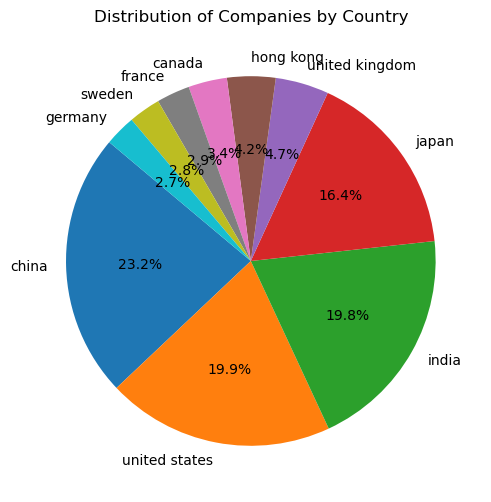

In [22]:
companies_per_country = dataset_API['country'].value_counts().head(10)  

plt.figure(figsize=(10, 6))

companies_per_country.plot(kind='pie', autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Companies by Country')

plt.ylabel('')

plt.show()



## Distribution of industry types within the dataset
- The industry with the highest presence in our dataset is "banks-regional," referring to the inclusion of several regional bank companies from each region that offer their banking services not nationally or internationally but regionally.
- Although there is no marked trend of a specific industry, the "banks-regional" industry does have a significantly high number of records to visually stand out compared to the second-ranked "specialty industrial machinery" ("banks-regional" with an 18.9% appearance within the dataset and "specialty industrial machinery" with a 13.7%), representing a difference of 5.2% between the first and second positions.

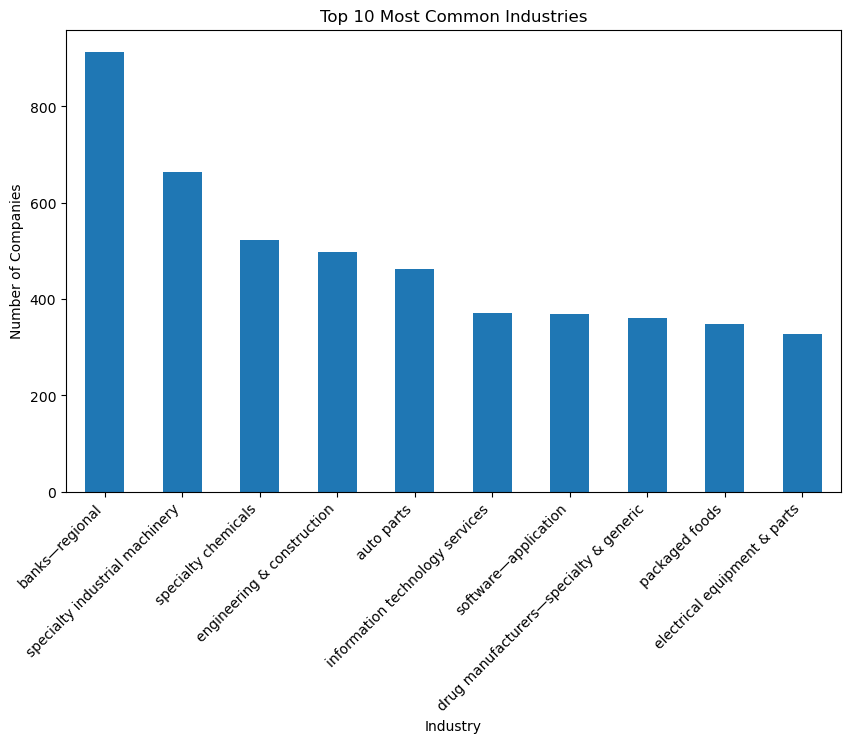

In [23]:
companies_per_industry = dataset_API['industry'].value_counts().head(10) 

plt.figure(figsize=(10, 6))

companies_per_industry.plot(kind='bar')

plt.title('Top 10 Most Common Industries')
plt.xlabel('Industry')
plt.ylabel('Number of Companies')

plt.xticks(rotation=45, ha='right')

plt.show()

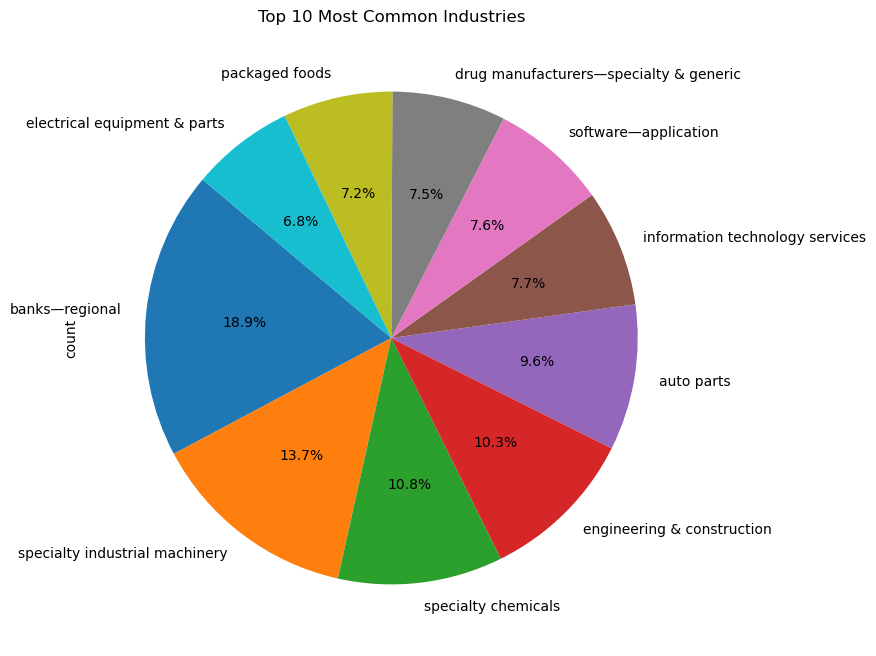

In [24]:
companies_per_industry = dataset_API['industry'].value_counts().head(10)

plt.figure(figsize=(8, 8))

companies_per_industry.plot(kind='pie', autopct='%1.1f%%', startangle=140)

plt.title('Top 10 Most Common Industries')

plt.show()


## Industries with less presence within the dataset
- In this graph, we find several industries referring to subcategories within the real estate sector, representing specific sectors within the investment real estate market, each with its particular focus on the type of property and associated business operations.
- The subcategories we are referring to are as follows: "REIT-Office," "REIT-Specialty," "REIT-Healthcare Facilities," and "REIT-HOTEL-MOTEL."

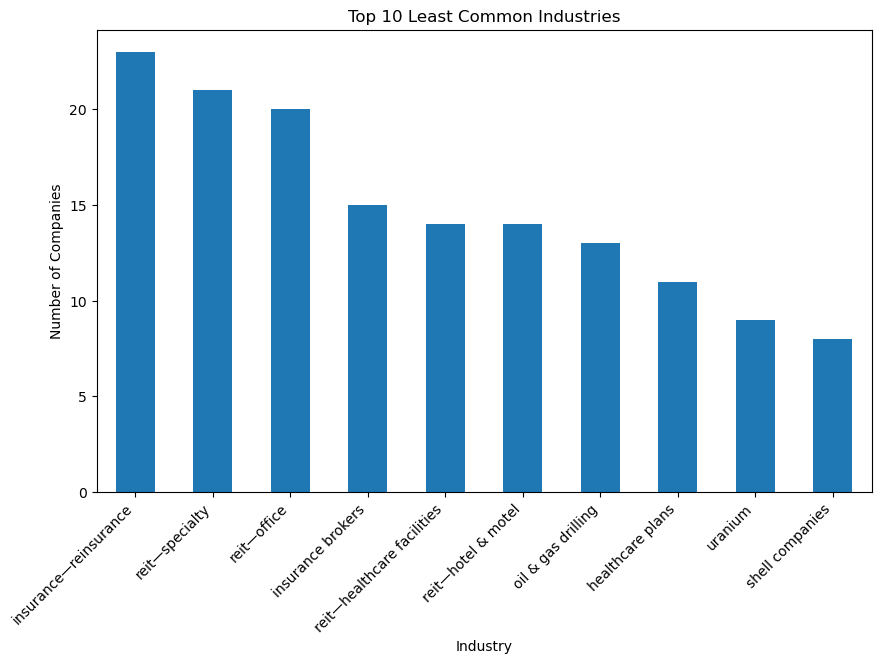

In [25]:
companies_per_industry_least_common = dataset_API['industry'].value_counts().tail(10)

plt.figure(figsize=(10, 6))

companies_per_industry_least_common.plot(kind='bar')

plt.title('Top 10 Least Common Industries')

plt.xlabel('Industry')

plt.ylabel('Number of Companies')

plt.xticks(rotation=45, ha='right')

plt.show()




## Industries with the highest average profit margin within the dataset
- We see how the "entertainment" industry has the highest profit margin in our dataset, indicating that on average, companies in this industry tend to have higher profit margins compared to other industries in our dataset.
- Thanks to the pie chart displayed in percentages, we can see that 58.3% of the profit margin of all industries in our dataset is captured by only one industry, "entertainment."
- Following the "entertainment" industry, we have the "medical instruments and supplies" industry with 11.6% and the gasoline industry with 7.3%.

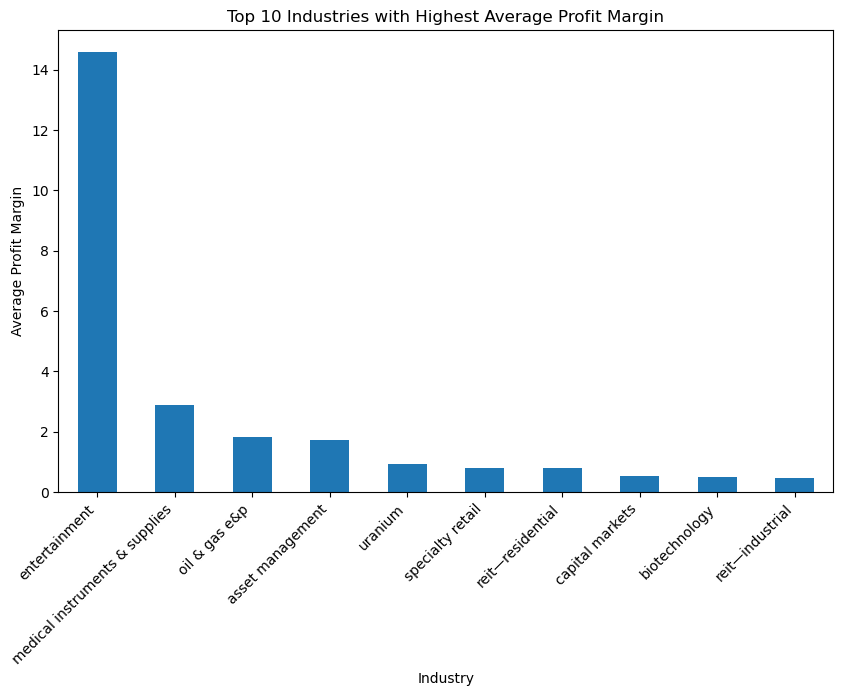

In [26]:
dataset_API['profit margins'] = pd.to_numeric(dataset_API['profit margins'], errors='coerce')

average_margin_by_industry = dataset_API.groupby('industry')['profit margins'].mean().sort_values(ascending=False)

top_industries = average_margin_by_industry.head(10)

plt.figure(figsize=(10, 6))

top_industries.plot(kind='bar')

plt.title('Top 10 Industries with Highest Average Profit Margin')
plt.xlabel('Industry')
plt.ylabel('Average Profit Margin')

plt.xticks(rotation=45, ha='right')

plt.show()





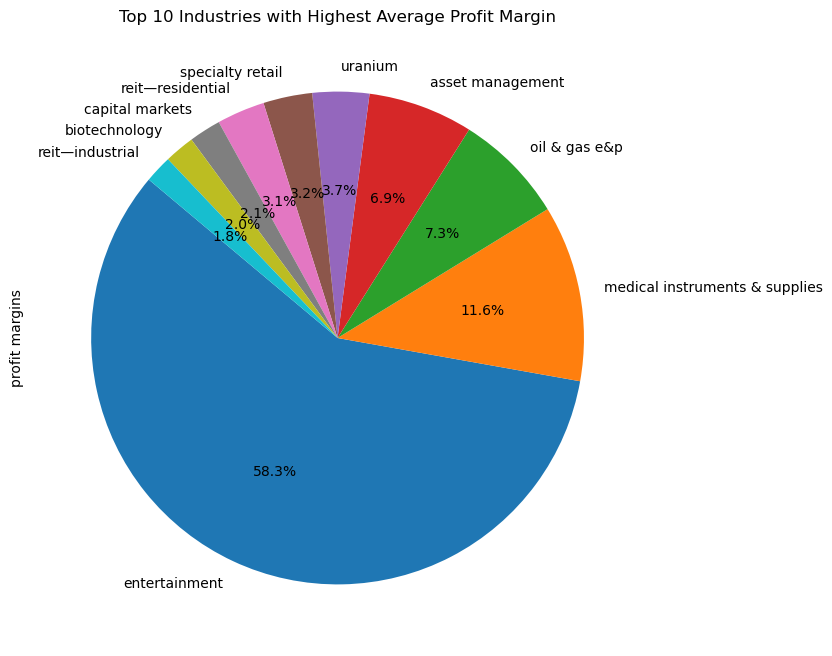

In [27]:
dataset_API['profit margins'] = pd.to_numeric(dataset_API['profit margins'], errors='coerce')

average_margin_by_industry = dataset_API.groupby('industry')['profit margins'].mean().sort_values(ascending=False)

top_industries = average_margin_by_industry.head(10)

plt.figure(figsize=(8, 8))

top_industries.plot(kind='pie', autopct='%1.1f%%', startangle=140)

plt.title('Top 10 Industries with Highest Average Profit Margin')

plt.show()



## Number of full-time employees by country
- We see how the "United States" takes the top spot as the country with the most full-time employees, with a percentage difference of 13.4% over the second country with the most employees, which is "China."
- It's not surprising to find these countries at the top, as both the "United States" and "China" represent giant economies, each handling a variety of international businesses and commerce.
- We have "Japan" as the third country with the most full-time employees, which aligns with what several news sources and anime depict regarding the long working hours to which the Japanese population is exposed.

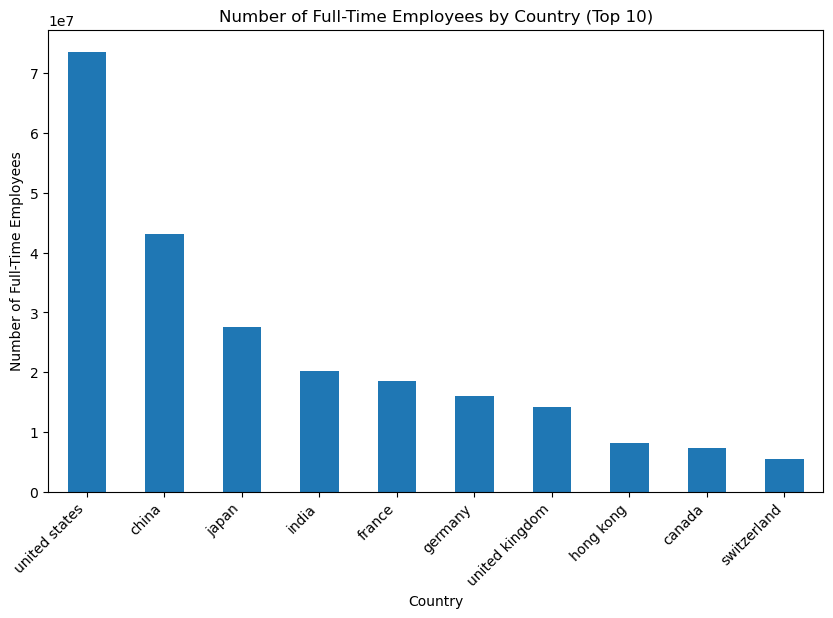

In [28]:
dataset_API['full time employees'] = pd.to_numeric(dataset_API['full time employees'], errors='coerce')

employees_by_country = dataset_API.groupby('country')['full time employees'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))

employees_by_country.plot(kind='bar')

plt.title('Number of Full-Time Employees by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Number of Full-Time Employees')

plt.xticks(rotation=45, ha='right')

plt.show()



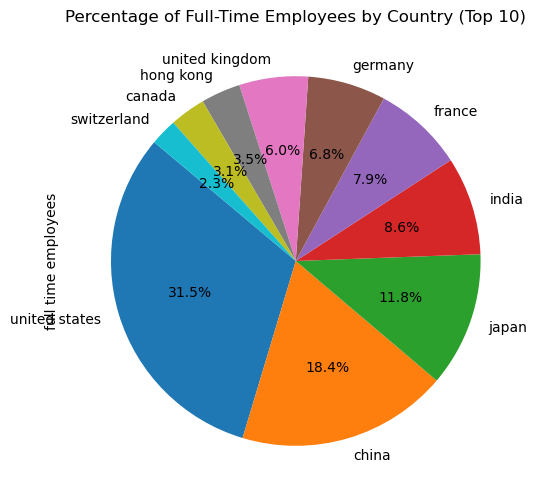

In [29]:
dataset_API['full time employees'] = pd.to_numeric(dataset_API['full time employees'], errors='coerce')

employees_by_country = dataset_API.groupby('country')['full time employees'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))

employees_by_country.plot(kind='pie', autopct='%1.1f%%', startangle=140)

plt.title('Percentage of Full-Time Employees by Country (Top 10)')

plt.show()




## Percentage of full-time employees by industry
- We have industries that we've seen before as the ones with the most records in our dataset, referring to the industries with the most companies in this dataset.
- These industries are "banks-regional" and "specialty industrial machinery."
- It's interesting to note that the industry with the highest percentage of full-time employees per industry is "banks-diversified," likely due to its wide range of services offered to a large number of clients, requiring full-time transactions and operations. This could also explain the presence of the "banks-regional" industry, as the services provided by both are essential for a 24-hour economy and society.

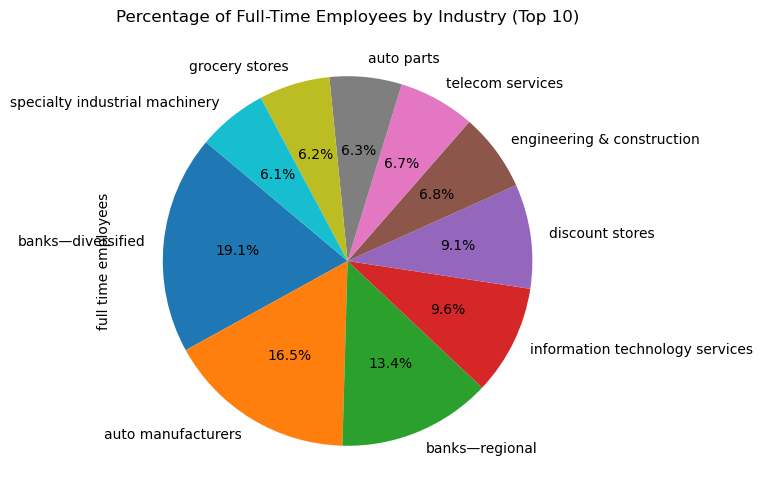

In [30]:
dataset_API['full time employees'] = pd.to_numeric(dataset_API['full time employees'], errors='coerce')

employees_by_industry = dataset_API.groupby('industry')['full time employees'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))

employees_by_industry.plot(kind='pie', autopct='%1.1f%%', startangle=140)

plt.title('Percentage of Full-Time Employees by Industry (Top 10)')

plt.show()



## General overview of the distribution of full-time employees by industry
- This graph provides a more comprehensive view of the distribution of full-time employees by industry.
- From this graph, we can observe that besides banking services, the technology and entertainment sectors also maintain a high volume of employees. This is likely due to the nature of the services they offer, which are essential and widely used in daily life by the population.

C:\Users\fedeg\AppData\Local\Temp\ipykernel_3820\3318799721.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_top_50['full time employees'] = pd.to_numeric(filtered_data_top_50['full time employees'], errors='coerce')


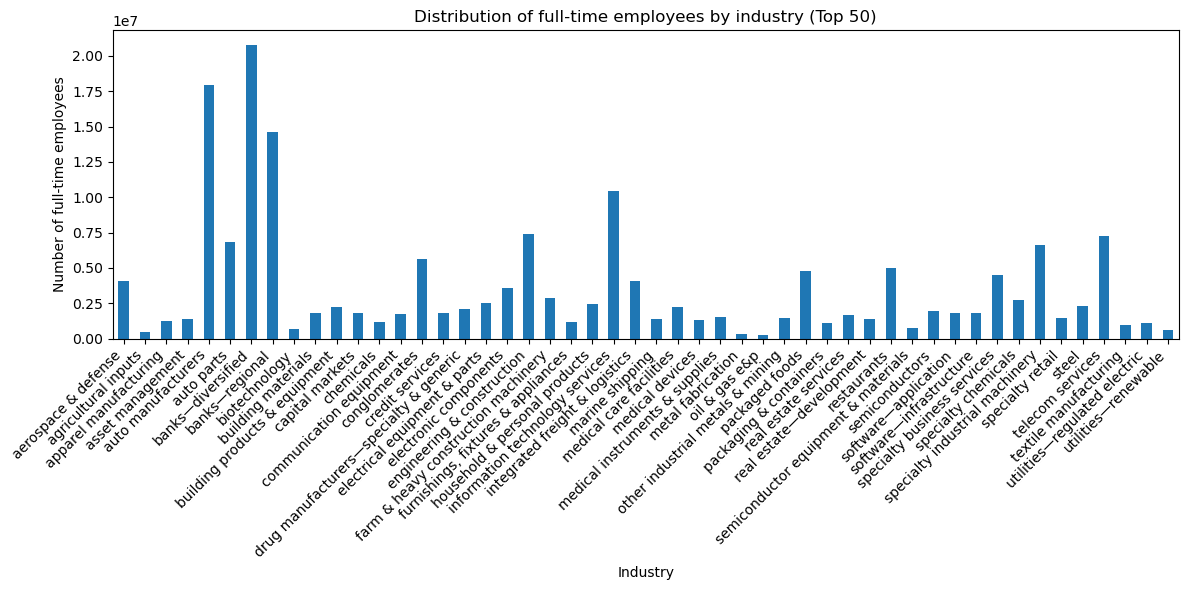

In [31]:
top_50_industries = dataset_API['industry'].value_counts().head(50).index

filtered_data_top_50 = dataset_API[dataset_API['industry'].isin(top_50_industries)]

filtered_data_top_50['full time employees'] = pd.to_numeric(filtered_data_top_50['full time employees'], errors='coerce')

employees_per_industry = filtered_data_top_50.groupby('industry')['full time employees'].sum()

plt.figure(figsize=(12, 6))

employees_per_industry.plot(kind='bar')

plt.title('Distribution of full-time employees by industry (Top 50)')

plt.xlabel('Industry')

plt.ylabel('Number of full-time employees')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()
